# Run these 4 cells first 

In [ ]:
pip install qiskit-algorithms

In [ ]:
pip install qiskit-aer

In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-03-02 19:50:09,382: Default instance: ibm-q/open/main


In [5]:
from qiskit_ibm_provider import IBMProvider
from qiskit_aer import AerSimulator
provider = IBMProvider()
print(provider)
backend=AerSimulator()
print(backend)

<IBMProvider>
AerSimulator('aer_simulator')


## Challenge #1
# Create a time evolved ising spin chain VQE circuit and use it to get the magnetization of the system over time
    
# Intro to problem
    Magnetic and electric fields are all around us and interact with the world, even down to the atomic level. These interactions are usually benign but can also be interactions we would want to model to predict the interaction between elements. One such model is the ising model, where a lattice of elements(not chemical elements) can have either a positive or negative spin, a +1 or a -1.
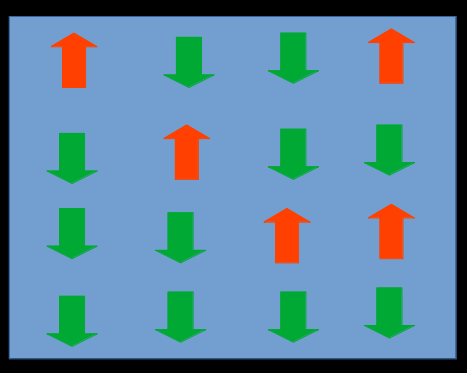
    The red and green arrows above represent the spin of the individual elements of the lattice.
#    
This model can be used, for example, to model the motion of atoms. As the atoms move through space and time, the ising model will show if a position is inhabited by an atom. A +1 showing a filled position and a -1 showing an empty position.
# Problem description
    Your task will be to model the evolution of an ising model as it evolves in the time domain using a quantum computer. To do this we will use a variable quantum eigensolver or VQE. VQE's use the the beneficial attributes of a quantum computer (superposition, entanglement, phase) to model complex systems and are especially well suited to NISQ devices as they have low circuit depth. They can also be hybrid solvers, using a classical computer to optimize the gates in their circuit in between calls to the quantum computer. This means they can provide a high fidelty of quantum operations since their depth is shorter.
    We are looking for the total magnetic energy of a series of particles as a magnetic wave passes through them. There will be a hamiltonian describing this system and it will be your task to design the VQE to solve the ising problem. The specific VQE we will be using is the time evolved VQE.
# Code description
    You will be provided with a series of helper functions to assist you in designing the VQE. You will also have the hamiltonian provided to you. Your task is to use the API information, literature, and github to write the missing parts of the code and run the experiment on a simulator or on real hardware.
    
# Notes on the solution
    We will be looking for two main deliverables
1. A completed time evolved ising spin VQE circuit
2. The results of an execution of this circuit, displaying the results returned from the simulator or real hardware. These results should be in tabular form and are generated by code from qiskit. We also want to see the results displayed on a graph with total magnetization on the y-axis and time on the x-axis.
#
Accompanying the deliverables above will be a write-up on the experiment and what the results would mean if you were to relay them back to a real system. This write up should also contain the following
a)introduction
b)description of the circuit
c)description of the experiment (how long did it run, what does the circuit look like after it has been transpiled, etc)
d)description of the results of the experiment
e)what makes a quantum computer well suited to this task? Think back to the properties of superposition, entanglement, and phase.
All other items considered equal, the write up will help us determine a winner. Spelling, grammar, and quality of the content will be factors in the judging.

# Usefull links
https://github.com/qiskit-community/qiskit-algorithms/tree/main/qiskit_algorithms/time_evolvers
-Qiskit time evolver VQE git repository

Stefano Barison, Filippo Vicentini, and Giuseppe Carleo (2021), An efficient
            quantum algorithm for the time evolution of parameterized circuits,
            `Quantum 5, 512 <https://quantum-journal.org/papers/q-2021-07-28-512/>'
            
https://docs.quantum.ibm.com/
-Qiskit documentation



In [6]:
import numpy as np
import matplotlib.pyplot as plt 


from qiskit.quantum_info import Pauli, SparsePauliOp


def generate_pauli(idx_x,idx_z,n):
	'''
	Args:
		n (integer)
		idx (list)
	Returns:
		tensor product of Pauli operators acting on qubits in idx
	'''

	xmask = [0]*n
	zmask = [0]*n
	for i in idx_x : xmask[i] = 1
	for i in idx_z : zmask[i] = 1

	a_x = np.asarray(xmask,dtype =bool)
	a_z = np.asarray(zmask,dtype =bool)

	return Pauli((a_z,a_x))


def generate_ising(n_spins,coup,field):
	'''
	Args:
		n_spins (integer)
		coup    (float)
		field   (float)
		
	Returns:
		Hamiltonian of Ising model with ZZ interaction a X transverse field
	'''

	int_list = []
	field_list = []


	for i in range(n_spins-1):
		int_list.append(generate_pauli([],[i,i+1],n_spins))

	for i in range(n_spins):
		field_list.append(generate_pauli([i],[],n_spins))

	int_coeff = [coup]*len(int_list)
	field_coeff = [field]*len(field_list)

	H = SparsePauliOp(int_list[0],int_coeff[0])

	for i in range(1,len(int_list)):
		H = H + SparsePauliOp(int_list[i],int_coeff[i])

	for i in range(len(field_list)):
		H = H + SparsePauliOp(field_list[i],field_coeff[i])

	return H


spins   = 3
V       = 0.25
g       = 1.0

H = generate_ising(spins,V,g)
print(H)


SparsePauliOp(['IZZ', 'ZZI', 'IIX', 'IXI', 'XII'],
              coeffs=[0.25+0.j, 0.25+0.j, 1.  +0.j, 1.  +0.j, 1.  +0.j])


In [ ]:
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_algorithms.time_evolvers import TimeEvolutionProblem, PVQD
from qiskit.primitives import Estimator,BackendEstimator, Sampler
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp, Pauli
from qiskit_algorithms.optimizers import L_BFGS_B

sampler = ### ENTER CODE HERE ###
fidelity = ### ENTER CODE HERE ###
estimator = ### ENTER CODE HERE ###

hamiltonian = H
observable = SparsePauliOp(["IZZ","IIX","IXI"], coeffs = [1,1,1])
ansatz = ### ENTER CODE HERE ###
initial_parameters = np.zeros(ansatz.num_parameters)

time = 1
optimizer = ### ENTER CODE HERE ###

# setup the algorithm
pvqd = PVQD(
    ### ENTER CODE HERE ###
)

# specify the evolution problem
problem = TimeEvolutionProblem(
    ### ENTER CODE HERE ###
)

# and evolve
result = ##REMOVE COMMENT AND ENTER CODE HERE ###.evolve(problem)

In [ ]:
print(result)

In [ ]:
plt.plot(result.times,result.observables)

plt.show()

## -------------------*******************-----------------------**********************----------------------------

# Challenge #2 
## Replace the CNOT entanglement gates of an Ansatz with feed-forward dynamic circuits

# Intro to problem
    Imagine you are a researcher using a quantum computer to provide you with output critical to your research. Everything is going fine while you are designing the circuit until you find you don't have enough qubits on a single quantum computer to complete the experiment. Luckly your well supplied lab has two quantum computers on which you can run your experiments, but how can you run a single experiment on two different quantum computers?
    To do this we will be using feed forward dynamic circuits. Dynamic circuits allow you implement mid-circuit measurements which can then be used to execute conditional gates on the qubits of you circuit.



How does this help you distribute a circuit across two quantum computers? You can take some information about the circuit you are currently running using dynamic circuits and send it to another quantum computer. This will allow you to use the qubits of the second quantum computer in your experiment provided you combine the results of measurement into a single probability distribution.
# Problem description
Your task will be to take an existing circuit and change the c-not gates on one of the qubits to be executed as a feed-forward dynamic circuit. 
# Code description
Since our circuit will start off with a low amount of qubits we do not require another quantum computer to get our results. To simulate needing another quantum computer we will be replacing the c-not gates on the bottom (MSB/MSQ) with a feed forward design. You could imagine that the qubit is in another register and belongs to another quantum computer.

# Notes on the solution
    We will be looking for the following deliverables.
1. A new circuit the will give the same results as the provided circuit, only the bottom qubit will be entangled with the nearest adjacent qubit with a feed forward mechanism.
2. The results of your execution of the new circuit you have developed. The results should match, or be very close to the results of the provided circuit. 
#
Accompanying the deliverables above will be a write-up on the experiment and what the results would mean if you were to relay them back to a real system. This write up should also contain the following a)introduction b)description of the circuit c)description of the experiment (how long did it run, what does the circuit look like after it has been transpiled, etc) d)description of the results of the experiment e)what makes a quantum computer well suited to this task? Think back to the properties of superposition, entanglement, and phase. All other items considered equal, the write up will help us determine a winner. Spelling, grammar, and quality of the content will be factors in the judging.

# Usefull links
Elisa Bäumer, Vinay Tripathi, Derek S. Wang, Patrick Rall,
Edward H. Chen, Swarnadeep Majumder, Alireza Seif, and Zlatko K. Minev (2023),Efficient Long-Range Entanglement using Dynamic Circuits,QIP 2024
https://arxiv.org/pdf/2308.13065.pdf
            
https://docs.quantum.ibm.com/
-Qiskit documentation

In [ ]:
def build_callback(ansatz, hamiltonian, estimator, callback_dict):
    """Return callback function that uses Estimator instance,
    and stores intermediate values into a dictionary.

    Parameters:
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance
        callback_dict (dict): Mutable dict for storing values

    Returns:
        Callable: Callback function object
    """

    def callback(eval_count, params, value, meta):
        # Keep track of the number of iterations
        callback_dict["eval_count"].append(eval_count)
        # Set the prev_vector to the latest one
        callback_dict["params"].append(params) 
        # Compute the value of the cost function at the current vector
        # This adds an additional function evaluation
        callback_dict["value"].append(value)
        # Print to screen on single line
        callback_dict["meta"].append(meta)
        print(
            "Evals. done: {} [value: {}]".format(eval_count, value),
            end="\r",
            flush=True,
        )

    return callback

In [ ]:
from qiskit.primitives import BackendEstimator
from qiskit.circuit.library import PauliTwoDesign,RealAmplitudes
from qiskit_algorithms.optimizers import SPSA
from qiskit_aer import Aer
from qiskit.compiler import transpile
from functools import partial
from scipy.optimize import minimize
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import SparsePauliOp

callback_dict = {
    "eval_count": [], 
    "params": [], 
    "value": [], 
    "meta": []
}


num_qubits = 4
reps = 3
seed = 0

spsa=SPSA(maxiter=100)
aer_simulator = Aer.get_backend('aer_simulator')
estimator = BackendEstimator(backend=aer_simulator)
optimizer = partial(minimize, method="L-BFGS-B")

hamiltonian = 1 * SparsePauliOp(["ZZII", "IZII", "ZIII", "ZZII"])
callback_func = build_callback(circuit, hamiltonian, estimator, callback_dict)
circuit = RealAmplitudes(num_qubits,reps=reps)
result = VQE(estimator=estimator,ansatz=circuit,optimizer=spsa,callback=callback_func).compute_minimum_eigenvalue(hamiltonian)


In [ ]:
circuit.decompose().draw('mpl')

In [ ]:
#Standard C-NOT gates

print(result)
fig, ax = plt.subplots()
evals = []
for p in range(1808):
    evals.append(p)
ax.plot(callback_dict["eval_count"], callback_dict["value"])
ax.set_xlabel("Iterations")
ax.set_ylabel("value")
plt.draw()

In [ ]:
from qiskit import QuantumCircuit,ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter
# param_list = []
# angle = Parameter("angle"+ str(1))
# param_list.append(angle)

alpha_register = QuantumRegister(4)
classic_reg = ClassicalRegister(1)
new_circuit = QuantumCircuit(alpha_register,classic_reg)
reps = 4
angle_list=[]
theta_count = 0


for i in ### ENTER CODE HERE ###:
    for l ### ENTER CODE HERE ###:
        ### ENTER CODE HERE ###

    for b in range(2,0,-1):
        new_circuit.cx(b-1,b)
    ### ENTER CODE HERE ###


new_circuit.draw('mpl')

In [ ]:
#Feed forward dynamic circuit

print(result)
fig, ax = plt.subplots()
evals = []
for p in range(2863):
    evals.append(p)
ax.plot(callback_dict["eval_count"], callback_dict["value"])
ax.set_xlabel("Iterations")
ax.set_ylabel("value")
plt.draw()

## -------------------*******************-----------------------**********************----------------------------

# Challenge #3 
## Correcting errors with a logical qubit

# Intro to problem
 Quantum computers currently can experience noise in their output due to their computation occurring at the scale we need quantum mechanics to describe. This noise will alter and change the expected output into one that is different in one of two ways. A bit-flip error or a phase flip error. The former error causing, at the point in computation on the particular qubit the error occurred, a change in the qubit's binary state. A one will become a zero and a zero will become a one. The latter error will cause, again at the point in computation and on the qubit where the error occurred, a change in the qubit's phase. A + will become a - and a - will become a +. These errors can also overlap with a combined bit and phase flip.
 We are alleviating these errors on current hardware with error mitigation and error suppression, methods which use statistical analysis and device profiling to mitigate and suppress errors to give you the output you were looking for. These methods are available on IBM hardware currently. In the next decade we will be solving errors with error correction, where you create a logical qubit out of many physical qubits. To the developer, their code can stay mostly the same and they will address the qubits they would theoretically need to compute their results. On the quantum computer, the code acting on a single qubit will be acting on multiple qubits. Why would using more noisy qubits result in less noise? If you get the error rate of all of the qubits below a certain percentage, say 1%, you can posit that out of a number of qubits you would only have a low number of qubits experience an error. So low a number that if you were to encode a gate onto the group of qubits, you could use the other qubits in the group to correct any errors that appear on any qubits in the group. You could then measure the group of qubits at the same time and if the qubits all agree on the error, you can know that the result you got was without error.
# Problem description
 You will be creating one of these logical qubits, specifically the bottom image below. Using the images provided below, write a circuit creating the logical qubit and execute a series of gates on this qubit.
# [SEE IMAGES]
 PAGE 6 - Austin G. Fowler, Matteo Mariantoni, John M. Martinis and Andrew N. Cleland (2012),Surface codes: Towards practical large-scale quantum computation,Phys. Rev. A 86, 032324
 
 PAGE 15 - Austin G. Fowler, Matteo Mariantoni, John M. Martinis and Andrew N. Cleland (2012),Surface codes: Towards practical large-scale quantum computation,Phys. Rev. A 86, 032324
 
 Both images were taken from the paper: Austin G. Fowler, Matteo Mariantoni, John M. Martinis and Andrew N. Cleland (2012),Surface codes: Towards practical large-scale quantum computation,Phys. Rev. A 86, 032324
# Code description
You will have to prepare the surface code(the name for this particular error correcting code) from the images above using Qiskit. You will then measure the qubits involved in the logical qubit and see what results were encountered. After you have the results of the circuit execution with the helper code provided below, you will do classical post-processing to correct the errors in your results and re-count your outputs to build a new probability distribution. We are also looking to see the results of a sample set of gates applied to the circuit and their error corrected output measurement. 
# Notes on the solution
Hint: There are two components to the surface code. Data qubits and check qubits; only one of them should have the sample gates applied to them.
    We will be looking for the following deliverables.
1. A circuit containing a logical z-cut qubit
2. A post-processing program written in python or another language if cleared by the judges first.
3. Results of running the circuit, both with and without gates applied to the logical qubit, corrected by your post processing program
#
Accompanying the deliverables above will be a write-up on the experiment and what the results would mean if you were to relay them back to a real system. This write up should also contain the following a)introduction b)description of the circuit c)description of the experiment (how long did it run, what does the circuit look like after it has been transpiled, etc) d)description of the results of the experiment e)what makes a quantum computer well suited to this task? Think back to the properties of superposition, entanglement, and phase. All other items considered equal, the write up will help us determine a winner. Spelling, grammar, and quality of the content will be factors in the judging.

# Usefull links
Austin G. Fowler, Matteo Mariantoni, John M. Martinis and Andrew N. Cleland (2012),Surface codes: Towards practical large-scale quantum computation,Phys. Rev. A 86, 032324
https://arxiv.org/ftp/arxiv/papers/1208/1208.0928.pdf
            
https://docs.quantum.ibm.com/
-Qiskit documentation

In [ ]:
def bit_flip(binary,bit):
    if binary[bit] == '1':
        binary[bit] = '0'
    else:
        binary[bit] = '1'
    return binary

In [ ]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit.primitives import BackendSampler
from qiskit.circuit import Parameter
from numpy import pi

alpha_register = QuantumRegister(12)

creg = ClassicalRegister(12)

new_circuit = QuantumCircuit(alpha_register,creg)

for i in range(11):
    if i % 2 == 0:
        #The three gates we want you to apply to the logical qubit
        #new_circuit.rx(pi/5,i)
        #new_circuit.h(i)
        #new_circuit.x(i)
### ENTER CODE HERE ###

tqc = transpile(new_circuit,backend)
results = BackendSampler(backend=backend).run(tqc).result()

In [ ]:
distribution = results.quasi_dists[0].binary_probabilities()

In [ ]:
ones = 0
zeros = 0
others = 0
for entry in distribution.keys():
    ### ENTER CODE HERE ###

In [ ]:
print(ones)
print(zeros)
print(others)

Questions designed by Morgan Cameron in 2024
@IBM